In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

RSEED=42

#Visual
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)




In [8]:
df_fraud = pd.read_csv('Merge_Frauddet,u.csv')
df_fraud.head(20)

,ID,invoice_date,tarif_type,counter_number,counter_statue,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,counter_type,client_catg,region,creation_date,target
0,0,24/03/2014,11,1335667.000,0,8,1,82,0,0,0,4,ELEC,11,101,31/12/1994,0
1,0,29/03/2013,11,1335667.000,0,6,1,1200,184,0,0,4,ELEC,11,101,31/12/1994,0
2,0,23/03/2015,11,1335667.000,0,8,1,123,0,0,0,4,ELEC,11,101,31/12/1994,0
3,0,13/07/2015,11,1335667.000,0,8,1,102,0,0,0,4,ELEC,11,101,31/12/1994,0
4,0,17/11/2016,11,1335667.000,0,9,1,572,0,0,0,12,ELEC,11,101,31/12/1994,0
5,0,17/07/2017,11,1335667.000,0,9,1,314,0,0,0,8,ELEC,11,101,31/12/1994,0
6,0,07/12/2018,11,1335667.000,0,9,1,541,0,0,0,12,ELEC,11,101,31/12/1994,0
7,0,19/03/2019,11,1335667.000,0,9,1,585,0,0,0,8,ELEC,11,101,31/12/1994,0
8,0,22/07/2011,11,1335667.000,0,9,1,1200,186,0,0,4,ELEC,11,101,31/12/1994,0
9,0,22/11/2011,11,1335667.000,0,6,1,1082,0,0,0,4,ELEC,11,101,31/12/1994,0


In [10]:
df_fraud.describe()

,ID,tarif_type,counter_number,counter_statue,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,months_number,client_catg,region,target
count,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000,1048575.000
mean,103836.467,20.136,120919976164.004,0.042,7.315,1.000,409.745,107.568,20.413,54.060,46.322,11.987,209.995,0.767
std,32065.556,13.482,1646702365322.078,0.375,1.360,0.083,588.275,1169.328,163.644,979.218,2594.754,6.159,103.552,2.661
min,0.000,8.000,0.000,0.000,6.000,0.000,0.000,0.000,0.000,0.000,1.000,11.000,101.000,0.000
25%,104718.000,11.000,121473.000,0.000,6.000,1.000,79.000,0.000,0.000,0.000,4.000,11.000,103.000,0.000
50%,112518.000,11.000,490475.000,0.000,6.000,1.000,272.000,0.000,0.000,0.000,4.000,11.000,301.000,0.000
75%,120486.000,40.000,1112725.000,0.000,9.000,1.000,601.000,0.000,0.000,0.000,4.000,11.000,308.000,0.000
max,128439.000,45.000,27381100000000.000,5.000,9.000,50.000,98889.000,819886.000,45360.000,343568.000,294406.000,51.000,399.000,10.000


In [25]:
df_fraud.info()
# missing values is done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   ID                    1048575 non-null  int64   
 1   invoice_date          1048575 non-null  object  
 2   tarif_type            1048575 non-null  int64   
 3   counter_number        1048575 non-null  float64 
 4   counter_statue        1048575 non-null  category
 5   reading_remarque      1048575 non-null  category
 6   counter_coefficient   1048575 non-null  int64   
 7   consommation_level_1  1048575 non-null  int64   
 8   consommation_level_2  1048575 non-null  int64   
 9   consommation_level_3  1048575 non-null  int64   
 10  consommation_level_4  1048575 non-null  int64   
 11  months_number         1048575 non-null  int64   
 12  counter_type          1048575 non-null  category
 13  client_catg           1048575 non-null  category
 14  region            

In [ ]:
# possible baseline models
# coefficient vs which consumption level the client is 
##
#adjust the data type
# categorical data (Counter status , reading_remarque , client_catg ,target )
# changed invoice_date and creation_date  to date formate

In [34]:
df_fraud= df_fraud.astype({"counter_statue":'category' ,'reading_remarque':'category' , 'client_catg':'category' ,"counter_type": 'category', 'target': 'category'})
#pd.to_datetime(df_fraud['invoice_date'],df_fraud['creation_date']) , format='%d%m%y'
df_fraud['invoice_date'] = pd.to_datetime(df_fraud['invoice_date'])
df_fraud['creation_date'] = pd.to_datetime(df_fraud['creation_date'])
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ID                    1048575 non-null  int64         
 1   invoice_date          1048575 non-null  datetime64[ns]
 2   tarif_type            1048575 non-null  int64         
 3   counter_number        1048575 non-null  float64       
 4   counter_statue        1048575 non-null  category      
 5   reading_remarque      1048575 non-null  category      
 6   counter_coefficient   1048575 non-null  int64         
 7   consommation_level_1  1048575 non-null  int64         
 8   consommation_level_2  1048575 non-null  int64         
 9   consommation_level_3  1048575 non-null  int64         
 10  consommation_level_4  1048575 non-null  int64         
 11  months_number         1048575 non-null  int64         
 12  counter_type          1048575 non-null  ca

In [43]:
# changed value target from 10 to 1 
# changed strings to cate (ELEC= 0 and Gas =1)

df_fraud["target"].replace(10, 1, inplace=True)
df_fraud["counter_type"].replace("ELEC", 0 ,inplace=True)
df_fraud["counter_type"].replace("GAZ", 1 ,inplace=True)


In [55]:
#add a new colum with total consumption level
df_fraud.eval('sum_consu = consommation_level_1 + consommation_level_2 + consommation_level_3 + consommation_level_4',inplace=True)

In [ ]:
sns.lineplot(data=df_fraud, x = 'counter_coefficient', y ='sum_consu')

<Axes: xlabel='counter_statue', ylabel='sum_consu'>

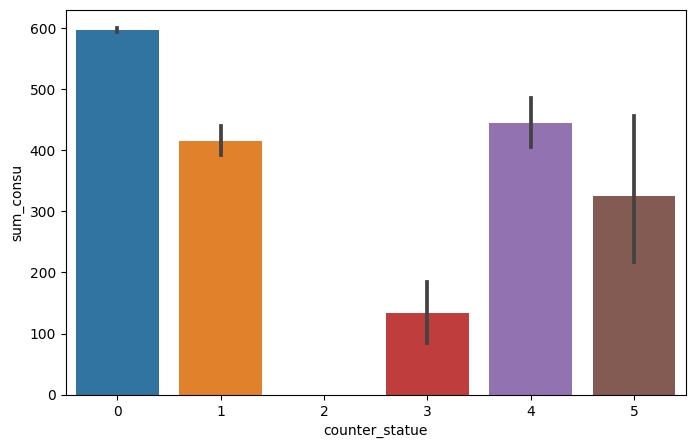

In [61]:
sns.barplot(data=df_fraud, x="counter_statue", y="sum_consu")


<Axes: xlabel='counter_coefficient', ylabel='sum_consu'>

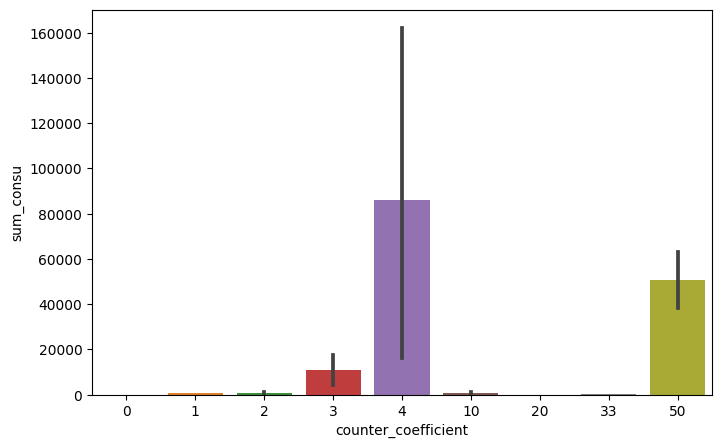

In [62]:
sns.barplot(data=df_fraud, x="counter_coefficient", y="sum_consu")

<Axes: xlabel='counter_coefficient', ylabel='sum_consu'>

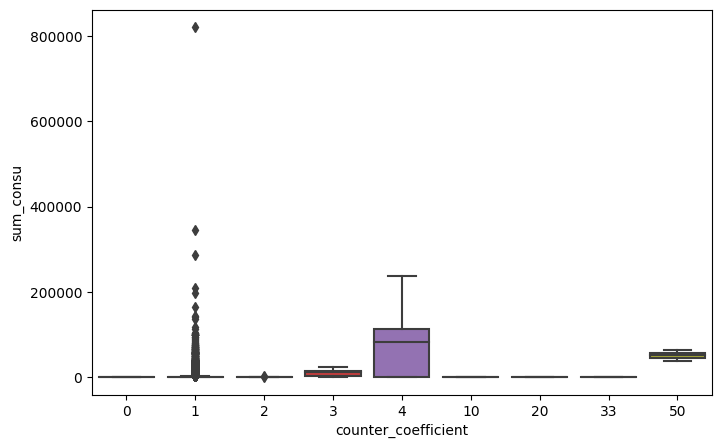

In [63]:
sns.boxplot(data=df_fraud, x="counter_coefficient", y="sum_consu")
#  having a very high coefficinet for consumption (10,20,33) while the sum of consumptuion is very low might be a indicator for counter manulatplation 
# using 10 times or more the standard coefficient should lead to at least 5X consumptuion 
 

In [66]:
sns.heatmap(df_fraud,annot=True)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [68]:
y = df_fraud['target']
X = df_fraud.drop('target', axis=1)

In [69]:
X_train , X_test , y_train , y_test = train_test_split(X,y, stratify=y, random_state=RSEED)

In [70]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (786431, 17)
X_test shape: (262144, 17)
y_train shape: (786431,)
y_test shape: (262144,)
